# 입문자를 위한, 파이썬/R 데이터 분석      

## Today's mission

- 데이터베이스 개념정리 : DBMS, DDL, DML, DCL

- SQLite 활용 

- 실습 (1) 주식 데이터 수집 및 DB 적재

- 실습 (2) DB 활용: SQLite 기준

- [참고] SQLAlchemy 소개


]

### 데이터베이스 개념정리

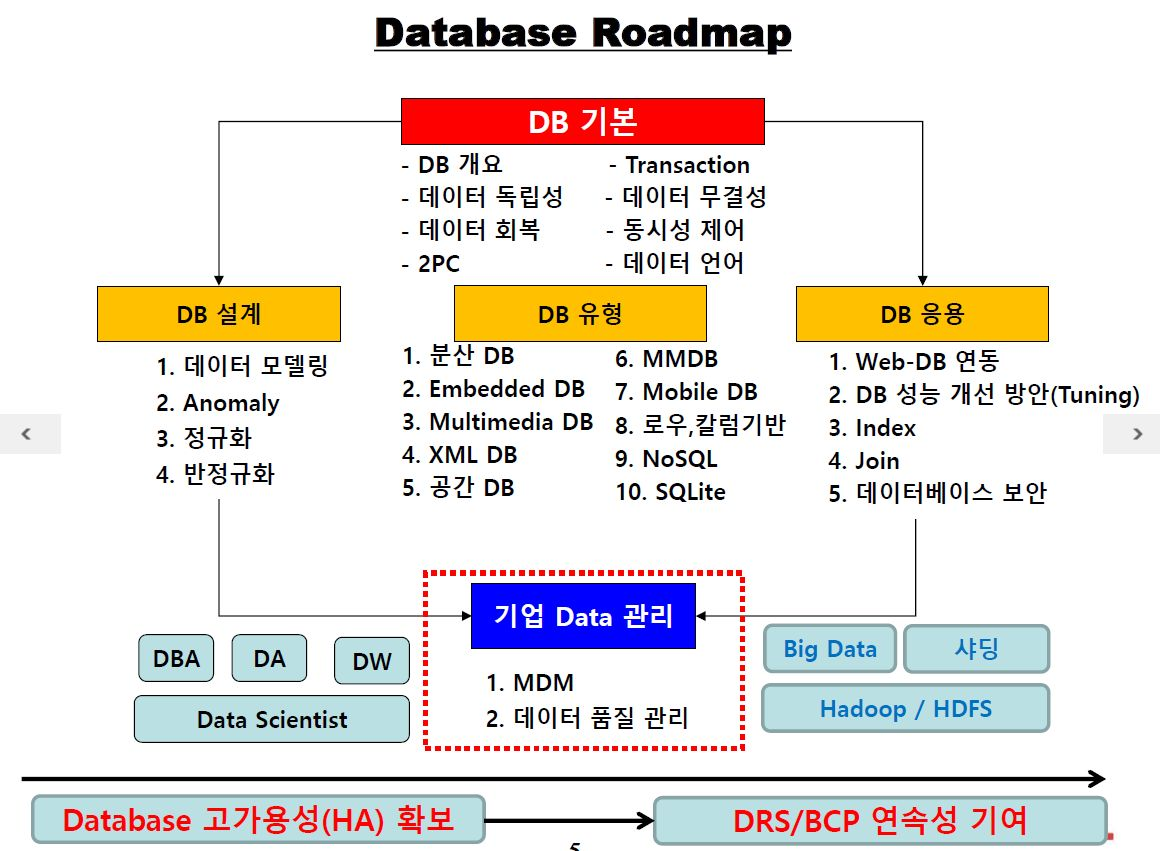

- Data Recovery(데이터복구)
- Two Phase Commit : https://weicomes.tistory.com/378 
- Anomaly : https://wkdtjsgur100.github.io/anomaly/
- 정규화 vs 반정규화 : https://owlyr.tistory.com/20
- MMDB : https://o-m-i.tistory.com/584
- NoSQL : https://www.samsungsds.com/kr/insights/1232564_4627.html
- 샤딩 : https://nesoy.github.io/articles/2018-05/Database-Shard
- 하둡 / HDFS : https://yeomko.tistory.com/38
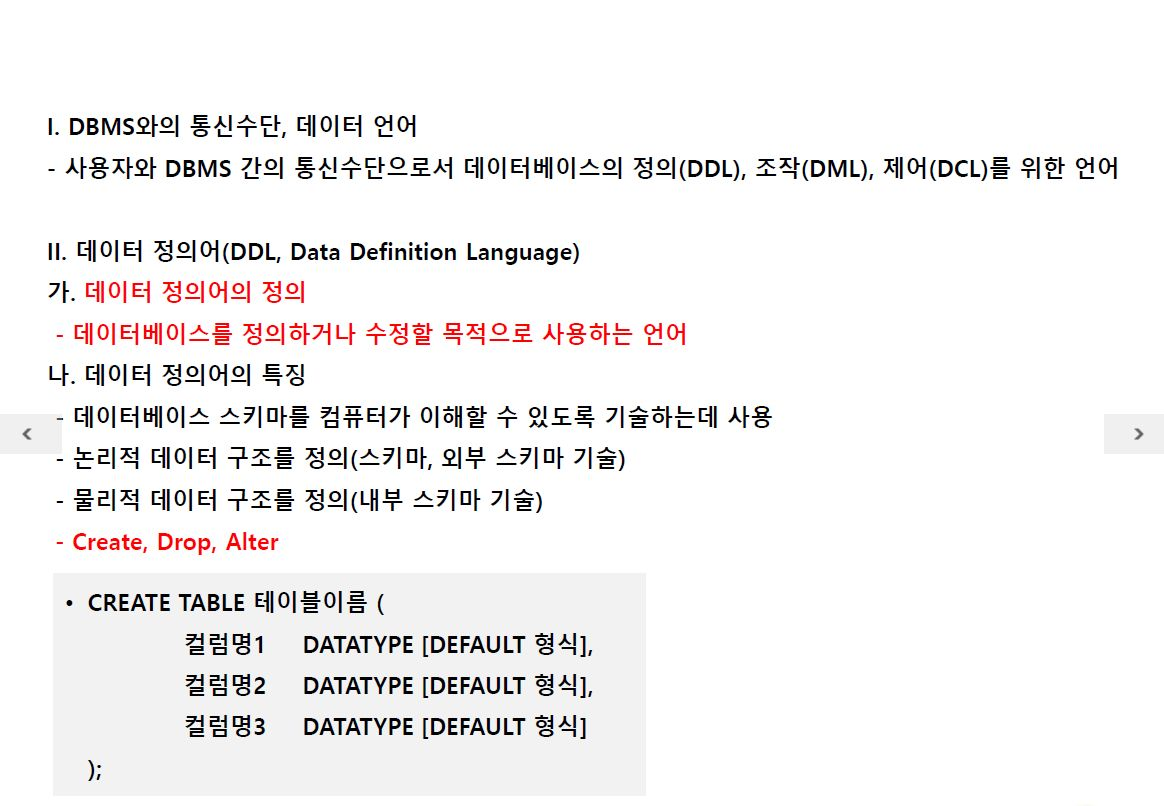
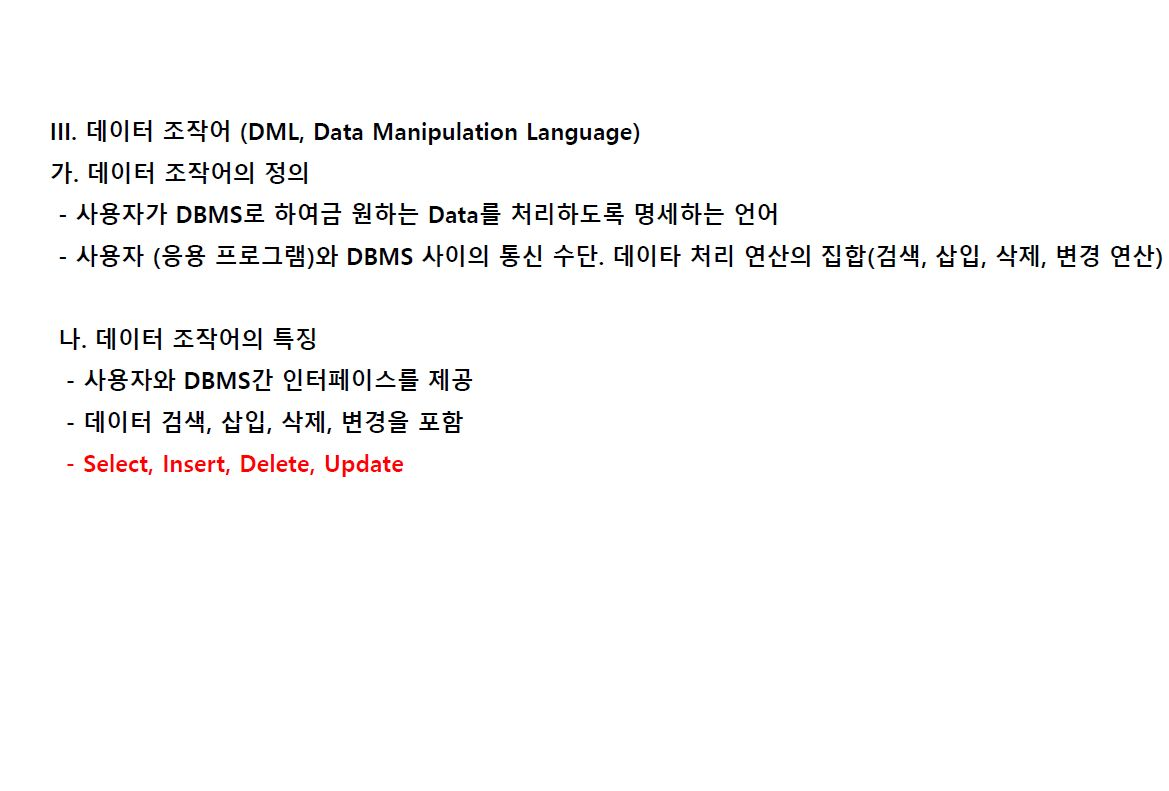
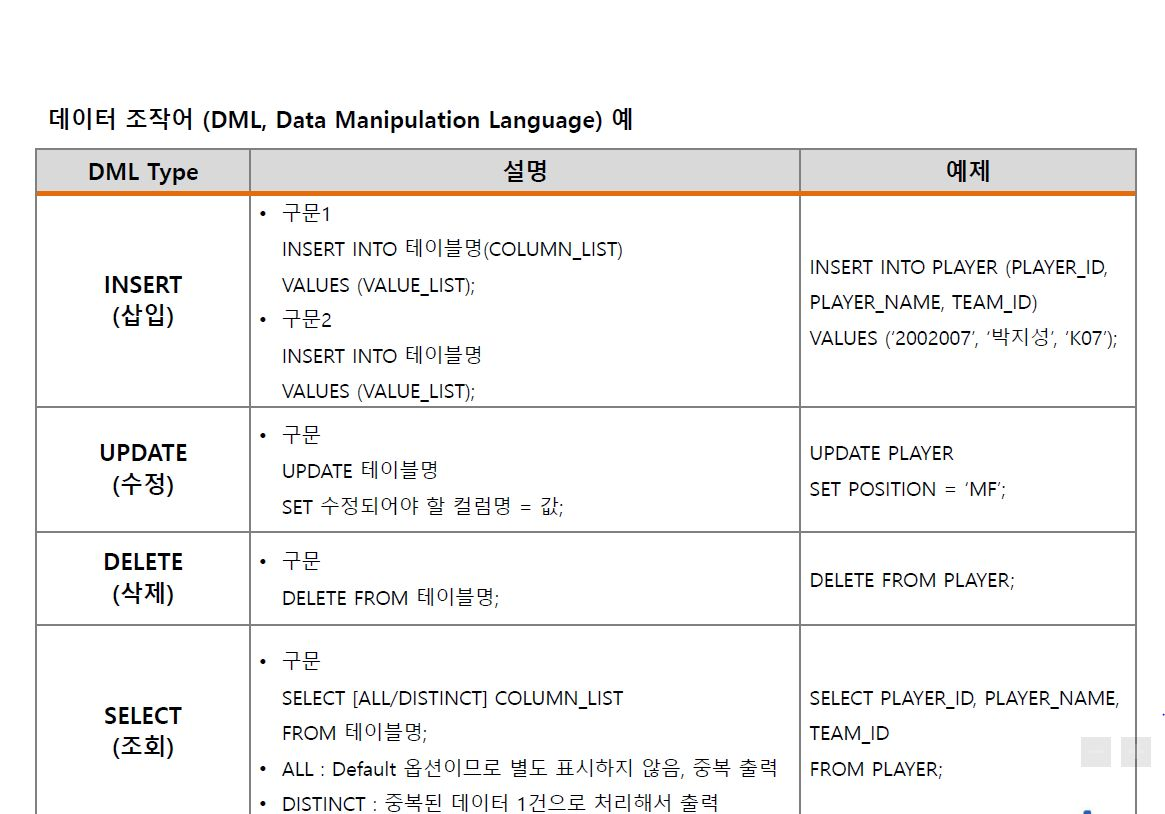
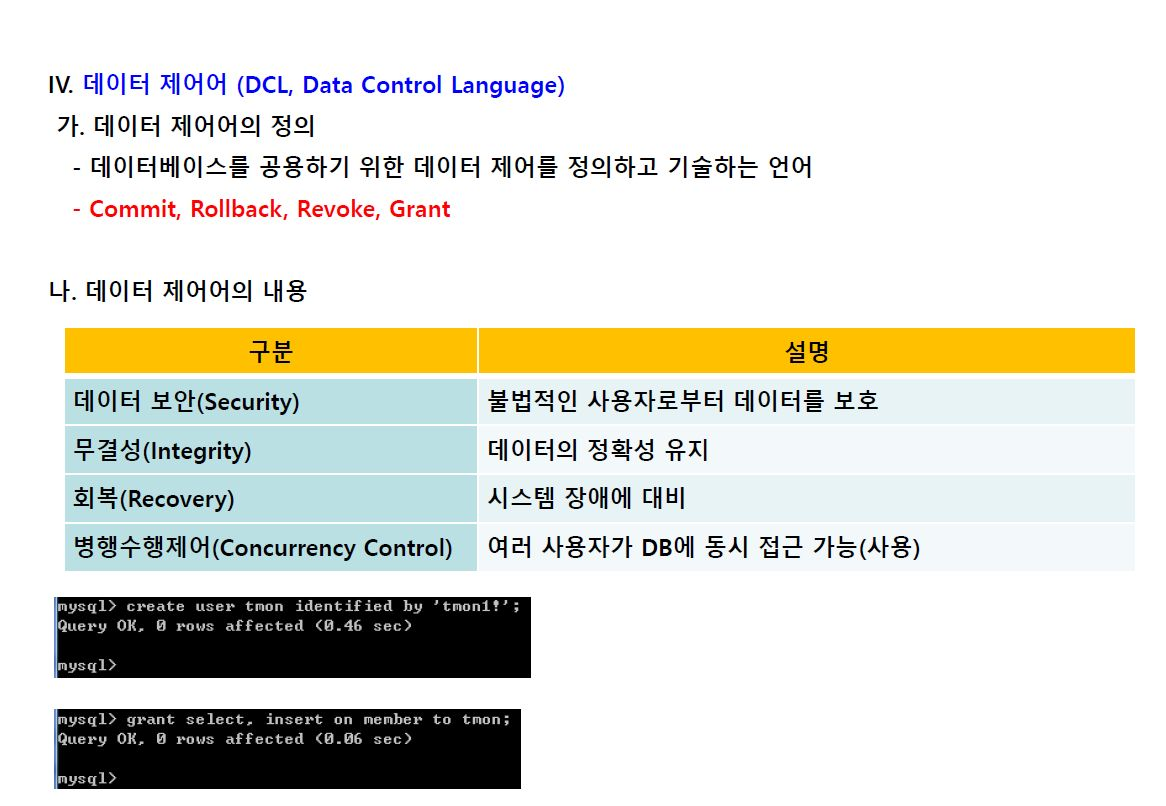

### SQLite 활용

- Python파이썬에서 SQLite3 기본으로 제공하기 때문에 특별한 작업없이 import 통해 바로 사용가능
- SQLite  : https://www.sqlite.org/index.html , 
- 관련문서 : https://docs.python.org/ko/3/library/sqlite3.html , https://wikidocs.net/5332
- 기타 : SQLite 쉽게 확인할 수 있는 DB Browser 도구 https://sqlitebrowser.org/dl/

In [1]:
import sqlite3

In [2]:
sqlite3.sqlite_version

'3.38.3'

In [93]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')
print(conn)

#### sqlite3 데이터베이스 CRUD (Create, Read, Update, Delete ) 
 - sqlite3.connect() 로 데이터베이스 연결 객체 conn 생성 
 - conn 객체의 cursor() 메소드를 이용, cursor 객체 생성
 - cursor 객체의 execute() 메소드를 이용하여 SQL 구문 실행
 - conn 객체의 commit() 메소드를 이용하여 최종 내용 데이터베이스에 반영 (commit, rollback 개념 참고 )
 - conn 데이터베이스 연결 closed (종료)
 

In [94]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db') #, isolation_level=None)

In [95]:
# cursor 객체 생성
cursor = conn.cursor()

In [24]:
# cursor 객체를 이용, SQL 구문 실행: 테이블 생성
#cursor.execute('''CREATE TABLE contact (name TEXT, age INT, email TEXT)''')

In [25]:
# 테이블 조회
cursor.execute('''SELECT 
                  * 
                  FROM 
                  contact''')
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [26]:
# conn 객체를 이용, SQL 작성 사례: 테이블 삭제
cursor.execute("DROP TABLE contact")

In [28]:
cursor.execute("select * from concat")

OperationalError: no such table: concat

In [29]:
# conn 객체를 통해 SQL 작성 사례
cursor.execute("CREATE TABLE contact (name text, age int, email text)")

In [30]:
# 생성된 테이블에 데이터 입력 
cursor.execute("INSERT INTO contact VALUES ('kim', 20, 'kim@megait.edu')")

In [31]:
cursor.execute("INSERT INTO contact VALUES ('lee', 40, 'lee@macademy.org')")

In [32]:
cursor.execute("INSERT INTO contact VALUES ('park', 60, 'park@daum.net')")

In [33]:
# 테이블 조회
cursor.execute('''select * from contact''')
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net')]

In [64]:
input_data = (
    ('홍', 25, 'hong@naver.com'),
    ('강', 34, 'kang@yes.kr'),
    ('진', 56, 'jin@mail.com'),
)

In [65]:
input_data

(('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com'))

In [36]:
sql = "INSERT INTO contact (name, age, email) values (?, ?, ?)"
sql

'INSERT INTO contact (name, age, email) values (?, ?, ?)'

In [37]:
cursor.executemany(sql, input_data)

In [38]:
# 테이블 조회
cursor.execute('''select * from contact''')
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [39]:
# Commit 을 수행하지 않으면 데이터베이스에 최종 반영되지 않음
conn.commit()

In [40]:
# 취소하려면 rollback 수행
#conn.rollback()

In [41]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### SQL 연습

In [44]:
cursor.execute("CREATE TABLE TEST (NAME text, Age int, weight float, height float)")

In [45]:
cursor.execute("insert into test values ('Test1', 20, 182.7, 78.9)")

In [46]:
cursor.execute('select * from test')
cursor.fetchall()

[('Test1', 20, 182.7, 78.9)]

In [47]:
cursor.execute("insert into test values ('Min', 35, 172.1, 97.1)")

In [ ]:
cursor.execute("insert into test (name, age, )")

In [54]:
cursor.execute("select * from test")
cursor.fetchall()

[('Test1', 20, 182.7, 78.9), ('Min', 35, 172.1, 97.1)]

In [59]:
cursor.execute("drop table test")

In [60]:
cursor.execute("select * from test")

OperationalError: no such table: test

In [61]:
conn.commit()

In [62]:
conn.close()

In [69]:
test_data = (
    ('TEST1', 20, 182.1, 78.2),
    ('TEST2', 30, 172.1, 65.5)
)

In [70]:
cursor.execute("create table test ('name' text, age int, height float, weight float)")

In [73]:
table_name = 'test'

In [107]:
sql_select = "SELECT ? from ?"
sql_insert = f"insert into {table_name} values (?, ?, ?, ?)"
sql_insert2 = f"insert into {table_name} values "

In [106]:
cursor.executemany(sql_insert, test_data)

OperationalError: table test1 has 2 columns but 4 values were supplied

In [96]:
cursor.execute("create table test1 ('name' text, age int)")

In [108]:
table_name = 'test1'

In [109]:
test_data2 = (
    ('test1', 10),
    ('test2', 20)
)

In [110]:
cursor.executemany(sql_insert2 + "(?, ?)", test_data2)

In [111]:
cursor.execute("select * from test1")
cursor.fetchall()

[('test1', 10), ('test2', 20)]

In [112]:
conn.commit()
conn.close()

#### sqlite3 데이터베이스 데이터 조회
 - sqlite3.connect() 로 데이터베이스 연결객체 Conn 생성 
 - Conn 객체의 cursor() 메소드를 이용, Cursor 객체 생성
 - Cursor 객체의 execute() 메소드를 이용하여 SQL 구문(SELECT 등) 실행
 - Conn 데이터베이스 연결 closed (종료)
 

In [84]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')

In [85]:
# cursor 객체 생성
cursor = conn.cursor()

In [86]:
# SQL 구문으로 데이터 조회 사례1 (리스트 형태)
cursor.execute('''SELECT * FROM contact''')

In [87]:
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [88]:
cursor.execute('''SELECT * FROM contact''')

In [89]:
cursor.fetchone()

('kim', 20, 'kim@megait.edu')

In [90]:
# SQL 구문으로 데이터 조회 사례2 (튜플 형태)
cursor.execute("SELECT * FROM contact")
for row in cursor:
    print(row)

('kim', 20, 'kim@megait.edu')
('lee', 40, 'lee@macademy.org')
('park', 60, 'park@daum.net')
('홍', 25, 'hong@naver.com')
('강', 34, 'kang@yes.kr')
('진', 56, 'jin@mail.com')


In [91]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### sqlite3 데이터베이스 구문파라미터 활용
 - ? 활용
 - : 활용

In [113]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')
# cursor 객체 생성
cursor = conn.cursor()

In [114]:
# SQL 구문으로 데이터 조회 사례1 (리스트 형태)
cursor.execute('''SELECT * FROM contact''')
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [115]:
cursor.execute( "SELECT * FROM contact WHERE name = 'lee'" )
cursor.fetchall()

[('lee', 40, 'lee@macademy.org')]

In [116]:
cursor.execute( "SELECT * FROM contact WHERE name = ?",('lee',) )   
# 1개 tuple 형 값을 가질 때, 반드시 콤마(,) 를 붙임에 유의
cursor.fetchall()

[('lee', 40, 'lee@macademy.org')]

In [117]:
user_name = 'park'

In [118]:
cursor.execute("SELECT * FROM contact WHERE name=:name",        # Dictionay 형태 활용
               {'name': user_name})
cursor.fetchall()

[('park', 60, 'park@daum.net')]

In [119]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### sqlite3 데이터베이스 수정 및 삭제
 - UPDATE
 - DELETE

In [132]:
# connection 객체를 생성
conn = sqlite3.connect('data/sqlite_test.db')
# cursor 객체 생성
cursor = conn.cursor()

In [133]:
cursor.execute("SELECT * FROM contact")
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('lee', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [127]:
cursor.execute(" UPDATE contact SET name='seo' WHERE email='lee@macademy.org' ")

In [128]:
cursor.execute("SELECT * FROM contact")
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('seo', 40, 'lee@macademy.org'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [129]:
cursor.execute("DELETE FROM contact WHERE email='lee@macademy.org'")

In [130]:
cursor.execute("SELECT * FROM contact")
cursor.fetchall()

[('kim', 20, 'kim@megait.edu'),
 ('park', 60, 'park@daum.net'),
 ('홍', 25, 'hong@naver.com'),
 ('강', 34, 'kang@yes.kr'),
 ('진', 56, 'jin@mail.com')]

In [ ]:
#conn.commit()

In [134]:
# 데이터베이스 종료: connection 연결 종료
conn.close()

#### Oracle 연결 예: 
 - Command 화면에서 : conda install cx_Oracle
   또는
 - !pip install cx_Oracle
 - 참조사이트 : https://pypi.org/project/cx_Oracle/

- cx_Oracle.makedsn(host, port, sid=None)    
   `#` host ip 또는 이름, port 1521 기본값, sid 설치때 확인가능
- cx_Oracle.connect(user=scott, password=tiger, dsn=None)  
   `#` user 사용자ID, passsword 패스워드, dsn 앞에서 생성한 정보
   

In [ ]:
# 예시:
# oracle_dsn = cx_Oracle.makedsn(host='10.34.34.123', port='1521', sid='xe')
# conn = cx_Oracle.connect(usser='scott', password='tiger', dsn=oracle_dsn)

### 실습 (1) 주식 데이터 수집 및 DB 적재
 - yahoo 에서 제공하는 주식데이터를 읽어와서 DataFrame 에 저장
 - sqlite db 에 테이블에 데이터 넣어보기

In [136]:
!pip install pandas-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 5.0 MB/s eta 0:00:00


In [153]:
import sqlite3
import pandas as pd
import pandas_datareader as pdr

In [138]:
pdr.DataReader('005930', 'naver')

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-20,44850,45500,44850,45500,7147785
2019-06-21,45750,45800,45200,45700,9454913
2019-06-24,45200,45800,45200,45500,6085066
2019-06-25,45200,45800,45200,45600,7076774
2019-06-26,45800,46000,45600,45700,9226097
...,...,...,...,...,...
2024-06-12,75300,77100,75200,76500,19246725
2024-06-13,78400,79000,77800,78600,33763804
2024-06-14,79700,80500,79000,79600,22926612


In [139]:
pdr.DataReader('005930', 'naver', pd.to_datetime('1999-01-01'), '2023-12-31')

,Open,High,Low,Close,Volume
Date,,,,,
1999-01-04,1776,1776,1624,1693,666160
1999-01-05,1692,1712,1649,1673,643209
1999-01-06,1702,1720,1651,1718,645110
1999-01-07,1761,1858,1723,1841,1412320
1999-01-08,1802,1839,1741,1742,830500
...,...,...,...,...,...
2023-12-21,74600,75000,74300,75000,13478766
2023-12-22,75800,76300,75400,75900,14515608
2023-12-26,76100,76700,75700,76600,13164909


In [140]:
df = pdr.DataReader('005930', 'naver', pd.to_datetime('1800-01-01'), '2024-12-31')

In [141]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8924 entries, 1990-01-03 to 2024-06-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    8924 non-null   object
 1   High    8924 non-null   object
 2   Low     8924 non-null   object
 3   Close   8924 non-null   object
 4   Volume  8924 non-null   object
dtypes: object(5)
memory usage: 418.3+ KB


In [143]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-03,44000,45000,43200,44800,26240
1990-01-04,45000,45800,44800,45300,41900
1990-01-05,45000,45300,44300,44300,27400
1990-01-06,44800,45000,44500,44500,26380
1990-01-08,44500,44900,44000,44000,14790
...,...,...,...,...,...
2024-06-12,75300,77100,75200,76500,19246725
2024-06-13,78400,79000,77800,78600,33763804
2024-06-14,79700,80500,79000,79600,22926612


In [159]:
# SQLite 넣기 위한 사전작업
# 1) Conn, 2) Cur, 3) Query(INSERT), 4) Commit, 5)Close
conn = sqlite3.connect('data/kospi-test.db')

In [160]:
cur = conn.cursor()

In [146]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-03,44000,45000,43200,44800,26240
1990-01-04,45000,45800,44800,45300,41900
1990-01-05,45000,45300,44300,44300,27400
1990-01-06,44800,45000,44500,44500,26380
1990-01-08,44500,44900,44000,44000,14790
...,...,...,...,...,...
2024-06-12,75300,77100,75200,76500,19246725
2024-06-13,78400,79000,77800,78600,33763804
2024-06-14,79700,80500,79000,79600,22926612


In [147]:
df.to_sql('samsung', conn, if_exists='replace')

8924

#### 방법1:

In [148]:
cur.execute("SELECT * FROM samsung")

In [149]:
#cur.fetchall()
cur.fetchone()

('1990-01-03 00:00:00', '44000', '45000', '43200', '44800', '26240')

In [150]:
df = pd.DataFrame(cur.fetchall())
df

,0,1,2,3,4,5
0,1990-01-04 00:00:00,45000,45800,44800,45300,41900
1,1990-01-05 00:00:00,45000,45300,44300,44300,27400
2,1990-01-06 00:00:00,44800,45000,44500,44500,26380
3,1990-01-08 00:00:00,44500,44900,44000,44000,14790
4,1990-01-09 00:00:00,44500,44500,43500,44300,31250
...,...,...,...,...,...,...
8918,2024-06-12 00:00:00,75300,77100,75200,76500,19246725
8919,2024-06-13 00:00:00,78400,79000,77800,78600,33763804
8920,2024-06-14 00:00:00,79700,80500,79000,79600,22926612
8921,2024-06-17 00:00:00,79200,79500,78000,78100,16123051


#### 방법 2:

In [151]:
read_df = pd.read_sql("SELECT * FROM samsung", conn, index_col='Date')
read_df

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-03 00:00:00,44000,45000,43200,44800,26240
1990-01-04 00:00:00,45000,45800,44800,45300,41900
1990-01-05 00:00:00,45000,45300,44300,44300,27400
1990-01-06 00:00:00,44800,45000,44500,44500,26380
1990-01-08 00:00:00,44500,44900,44000,44000,14790
...,...,...,...,...,...
2024-06-12 00:00:00,75300,77100,75200,76500,19246725
2024-06-13 00:00:00,78400,79000,77800,78600,33763804
2024-06-14 00:00:00,79700,80500,79000,79600,22926612


In [152]:
conn.close()

#### SQL 연습

In [157]:
pdr.DataReader('066570', 'naver')

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-20,80700,81500,80000,80500,426167
2019-06-21,80500,81100,79800,80400,479526
2019-06-24,81000,81300,80300,81300,340793
2019-06-25,81200,81300,79600,80300,399565
2019-06-26,79600,79900,78100,79300,599410
...,...,...,...,...,...
2024-06-12,99900,101200,99000,100600,1143396
2024-06-13,101100,101100,98700,98700,1290744
2024-06-14,98700,99300,97900,98900,725460


In [158]:
df = pdr.DataReader('066570', 'naver', pd.to_datetime('2000-01-01'), '2023-12-31')
df

,Open,High,Low,Close,Volume
Date,,,,,
2002-04-22,55509,63815,55509,62936,8151792
2002-04-23,60688,61372,57170,57464,5384435
2002-04-24,58147,59418,53065,55705,4659371
2002-04-25,53750,55118,50622,51209,3913730
2002-04-26,50622,54727,49156,53555,4176615
...,...,...,...,...,...
2023-12-21,98500,100400,98500,99500,543574
2023-12-22,100400,100400,99000,99700,319969
2023-12-26,100600,100600,99200,100000,313537


In [161]:
df.to_sql('LG', conn, if_exists='replace')

5363

In [164]:
cur.execute('select * from LG')
cur.fetchone()

('2002-04-22 00:00:00', '55509', '63815', '55509', '62936', '8151792')

In [165]:
df1 = pd.DataFrame(cur.fetchall())
df1

,0,1,2,3,4,5
0,2002-04-23 00:00:00,60688,61372,57170,57464,5384435
1,2002-04-24 00:00:00,58147,59418,53065,55705,4659371
2,2002-04-25 00:00:00,53750,55118,50622,51209,3913730
3,2002-04-26 00:00:00,50622,54727,49156,53555,4176615
4,2002-04-29 00:00:00,50134,52186,50134,51014,1990302
...,...,...,...,...,...,...
5357,2023-12-21 00:00:00,98500,100400,98500,99500,543574
5358,2023-12-22 00:00:00,100400,100400,99000,99700,319969
5359,2023-12-26 00:00:00,100600,100600,99200,100000,313537
5360,2023-12-27 00:00:00,100000,100000,98700,100000,306136


In [166]:
read_df1 = pd.read_sql("select * from lg", conn, index_col='Date')
read_df1

,Open,High,Low,Close,Volume
Date,,,,,
2002-04-22 00:00:00,55509,63815,55509,62936,8151792
2002-04-23 00:00:00,60688,61372,57170,57464,5384435
2002-04-24 00:00:00,58147,59418,53065,55705,4659371
2002-04-25 00:00:00,53750,55118,50622,51209,3913730
2002-04-26 00:00:00,50622,54727,49156,53555,4176615
...,...,...,...,...,...
2023-12-21 00:00:00,98500,100400,98500,99500,543574
2023-12-22 00:00:00,100400,100400,99000,99700,319969
2023-12-26 00:00:00,100600,100600,99200,100000,313537


In [167]:
pdr.DataReader('005380', 'naver')

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-20,139500,141000,139000,140500,259704
2019-06-21,140000,141000,139500,140500,291573
2019-06-24,142000,143500,141500,142500,287939
2019-06-25,142500,142500,140500,141500,294735
2019-06-26,141000,142000,140000,141500,239375
...,...,...,...,...,...
2024-06-12,273000,273000,268000,270000,567334
2024-06-13,273000,281000,269000,269000,1862106
2024-06-14,268500,274000,267000,268000,778015


In [169]:
df2 = pdr.DataReader('005380', 'naver', pd.to_datetime('2010-01-01'), '2020-12-31')
df2

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,119500,120500,118000,119000,1606672
2010-01-05,118000,119000,110000,110000,3051322
2010-01-06,111000,112500,108000,111000,1683782
2010-01-07,111000,111500,105000,106000,1739446
2010-01-08,106000,107000,102500,106000,2180088
...,...,...,...,...,...
2020-12-23,183000,188500,183000,185000,1301433
2020-12-24,185000,189000,185000,187000,1061140
2020-12-28,189000,193000,187500,189500,2410348


In [170]:
df2.to_sql('Hyundai', conn, if_exists='replace')

2714

In [172]:
cur.execute('select * from Hyundai')
cur.fetchone()

('2010-01-04 00:00:00', '119500', '120500', '118000', '119000', '1606672')

In [173]:
df3 = pd.DataFrame(cur.fetchall())
df3

,0,1,2,3,4,5
0,2010-01-05 00:00:00,118000,119000,110000,110000,3051322
1,2010-01-06 00:00:00,111000,112500,108000,111000,1683782
2,2010-01-07 00:00:00,111000,111500,105000,106000,1739446
3,2010-01-08 00:00:00,106000,107000,102500,106000,2180088
4,2010-01-11 00:00:00,107500,107500,101500,101500,1894737
...,...,...,...,...,...,...
2708,2020-12-23 00:00:00,183000,188500,183000,185000,1301433
2709,2020-12-24 00:00:00,185000,189000,185000,187000,1061140
2710,2020-12-28 00:00:00,189000,193000,187500,189500,2410348
2711,2020-12-29 00:00:00,191000,191500,188000,190500,1488327


In [174]:
read_df2 = pd.read_sql('Select * from hyundai', conn, index_col='Date')
read_df2

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,119500,120500,118000,119000,1606672
2010-01-05 00:00:00,118000,119000,110000,110000,3051322
2010-01-06 00:00:00,111000,112500,108000,111000,1683782
2010-01-07 00:00:00,111000,111500,105000,106000,1739446
2010-01-08 00:00:00,106000,107000,102500,106000,2180088
...,...,...,...,...,...
2020-12-23 00:00:00,183000,188500,183000,185000,1301433
2020-12-24 00:00:00,185000,189000,185000,187000,1061140
2020-12-28 00:00:00,189000,193000,187500,189500,2410348


In [175]:
pdr.DataReader('000660', 'naver')

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-20,67200,67400,66200,67300,2773637
2019-06-21,67100,67300,65900,65900,2403002
2019-06-24,65900,67400,65600,66900,2164462
2019-06-25,66700,67400,66300,66700,1873766
2019-06-26,68300,69600,67900,68900,5024201
...,...,...,...,...,...
2024-06-12,212000,216000,211000,215000,2151331
2024-06-13,226000,226500,219000,222000,5777279
2024-06-14,225000,225000,216000,221000,3311223


In [178]:
df_sk = pdr.DataReader('000660', 'naver', pd.to_datetime('2021-01-01'), '2024-12-31')
df_sk

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,124500,128000,120500,126000,7995016
2021-01-05,124500,132500,124000,130500,7180224
2021-01-06,132500,137000,130000,131000,8525749
2021-01-07,132500,137500,131500,134500,5981299
2021-01-08,136000,138000,132500,138000,8713010
...,...,...,...,...,...
2024-06-12,212000,216000,211000,215000,2151331
2024-06-13,226000,226500,219000,222000,5777279
2024-06-14,225000,225000,216000,221000,3311223


In [179]:
df_sk.to_sql('SK', conn, if_exists='replace')

852

In [180]:
cur.execute("select * from sk")
cur.fetchone()

('2021-01-04 00:00:00', '124500', '128000', '120500', '126000', '7995016')

In [181]:
df_sk2 = pd.DataFrame(cur.fetchall())
df_sk2

,0,1,2,3,4,5
0,2021-01-05 00:00:00,124500,132500,124000,130500,7180224
1,2021-01-06 00:00:00,132500,137000,130000,131000,8525749
2,2021-01-07 00:00:00,132500,137500,131500,134500,5981299
3,2021-01-08 00:00:00,136000,138000,132500,138000,8713010
4,2021-01-11 00:00:00,138000,140000,131000,133000,11154671
...,...,...,...,...,...,...
846,2024-06-12 00:00:00,212000,216000,211000,215000,2151331
847,2024-06-13 00:00:00,226000,226500,219000,222000,5777279
848,2024-06-14 00:00:00,225000,225000,216000,221000,3311223
849,2024-06-17 00:00:00,219000,229500,219000,223000,2198340


In [182]:
read_sk = pd.read_sql('select * from sk', conn, index_col='Date')
read_sk

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04 00:00:00,124500,128000,120500,126000,7995016
2021-01-05 00:00:00,124500,132500,124000,130500,7180224
2021-01-06 00:00:00,132500,137000,130000,131000,8525749
2021-01-07 00:00:00,132500,137500,131500,134500,5981299
2021-01-08 00:00:00,136000,138000,132500,138000,8713010
...,...,...,...,...,...
2024-06-12 00:00:00,212000,216000,211000,215000,2151331
2024-06-13 00:00:00,226000,226500,219000,222000,5777279
2024-06-14 00:00:00,225000,225000,216000,221000,3311223


### 실습 (2) DB 활용: SQLite 기준

In [183]:
import pandas as pd
import sqlite3

In [184]:
connection = sqlite3.connect('data/pandas-transaction.db')
#connection = sqlite3.connect('data/pandas-transaction.db')
connection

### sqlite_master : 메타 데이터 테이블

In [185]:
query = "select * from 'sqlite_master'"       
# 해당 DB에서 전체 Master 되는 Table 들 조회시 사용
pd.read_sql(query, connection)

,type,name,tbl_name,rootpage,sql
0,table,transaction,transaction,2,"CREATE TABLE ""transaction"" (\n""Name"" TEXT,\n ..."
1,table,product,product,4,"CREATE TABLE ""product"" (\n""product"" TEXT,\n ""..."
2,table,user,user,3,"CREATE TABLE ""user"" (\n""Name"" TEXT,\n ""Age"" I..."


In [186]:
print(pd.read_sql(query, connection)['sql'][0])

CREATE TABLE "transaction" (
"Name" TEXT,
  "date" TEXT,
  "amount" INTEGER,
  "product" TEXT,
  "result" TEXT
)


#### SQL 는 대소문자 무관함
'''   
SELECT  [컬럼명]     
        FROM [ '테이블명' ]     
        WHERE  [조건]     
        ORDER BY  [정렬조건]    
        LIMIT [가져올Record수]   
        '''

In [187]:
query = "select * from 'transaction'"         
# transaction은 DB 의 예약어 keyword이므로 ' ' 로 묶은 것은 Table 이름이기 때문임
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [188]:
transaction = pd.read_sql(query, connection)
transaction

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


### pandas DataFrame  vs. SQL 결과 비교 (예)

In [189]:
transaction[['product','amount']].head(5)

,product,amount
0,apple,500
1,banana,700
2,apple,800
3,cereal,500
4,kiwi,1200


In [190]:
query = "select product, amount from 'transaction' limit 5"
pd.read_sql(query, connection)

,product,amount
0,apple,500
1,banana,700
2,apple,800
3,cereal,500
4,kiwi,1200


### 정렬하기 : pandas DataFrame  vs. SQL 결과 비교 (예)

In [191]:
transaction.sort_values(by='amount', ascending=False).head(5)     
# 오름차순 ascending=True 가 기본값임; sort_values(by='amount', acending=True)

,Name,date,amount,product,result
4,Kang,2017-01-08,1200,kiwi,confirmed
2,Choi,2017-01-05,800,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
6,Lee,2017-01-09,700,banana,confirmed
0,Kang,2017-01-01,500,apple,confirmed


In [194]:
query = "select * from 'transaction' order by amount desc"   
# ASC 오름차순(순차정렬),     DESC 내림차순(역순정렬)
pd.read_sql(query, connection).head(5)

,Name,date,amount,product,result
0,Kang,2017-01-08,1200,kiwi,confirmed
1,Choi,2017-01-05,800,apple,confirmed
2,Kim,2017-01-03,700,banana,confirmed
3,Lee,2017-01-09,700,banana,confirmed
4,Kang,2017-01-01,500,apple,confirmed


In [195]:
# 상위 Top 표시 옵션 : 
query = "select * from 'transaction' order by amount desc limit 5"   # LIMIT n  상위 n 개 표시
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Kang,2017-01-08,1200,kiwi,confirmed
1,Choi,2017-01-05,800,apple,confirmed
2,Kim,2017-01-03,700,banana,confirmed
3,Lee,2017-01-09,700,banana,confirmed
4,Kang,2017-01-01,500,apple,confirmed


####  SQL 줄바꾸기 tip :  " " "  을 사용함

In [196]:
       #"""
query = '''      
        select *
        from 'transaction'
        order by amount desc
        limit 5
        '''              
        #"""
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Kang,2017-01-08,1200,kiwi,confirmed
1,Choi,2017-01-05,800,apple,confirmed
2,Kim,2017-01-03,700,banana,confirmed
3,Lee,2017-01-09,700,banana,confirmed
4,Kang,2017-01-01,500,apple,confirmed


#### EQUAL ( == )

In [197]:
transaction[(transaction['product'] == 'banana')&(transaction['Name'] == 'Lee')]
# pandas 통해서 실습결과

,Name,date,amount,product,result
6,Lee,2017-01-09,700,banana,confirmed


In [201]:
query = """                                         
        select *
        from 'transaction'
        where product == 'banana' and Name = 'Lee'
        """
pd.read_sql(query, connection)                # SQL 을 통해 실습결과

,Name,date,amount,product,result
0,Lee,2017-01-09,700,banana,confirmed


In [244]:
query3 = """
    select *
    from 'transaction'
    where name == 'Lee' or
    amount = 700
"""
pd.read_sql(query3, connection)

,Name,date,amount,product,result
0,Kim,2017-01-03,700,banana,confirmed
1,Lee,2017-01-09,700,banana,confirmed


####  NOT EQUAL ( <> )

In [202]:
transaction[transaction['product'] != 'banana']        # pandas 통해서 실습결과

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [204]:
query = """                                         
        select *
        from 'transaction'
        where product <> 'banana'
        """
pd.read_sql(query, connection)                # SQL 을 통해 실습결과

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Choi,2017-01-05,800,apple,confirmed
2,Park,2017-01-07,500,cereal,canceled
3,Kang,2017-01-08,1200,kiwi,confirmed
4,Choi,2017-01-09,100,melon,confirmed
5,Yoon,2017-01-10,200,cereal,canceled


In [236]:
query2 = "select * from 'transaction' where name != 'Choi'"
pd.read_sql(query2, connection)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Park,2017-01-07,500,cereal,canceled
3,Kang,2017-01-08,1200,kiwi,confirmed
4,Lee,2017-01-09,700,banana,confirmed
5,Yoon,2017-01-10,200,cereal,canceled


#### BETWEEN

In [205]:
#(transaction['amount'] >= 400) & (transaction['amount'] <= 500)

In [206]:
transaction[(transaction['amount'] >= 400) & (transaction['amount'] <= 500)]

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled


In [207]:
query = """                                         
        select *
        from 'transaction'
        where amount >= 400 and amount <= 500
        """
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Park,2017-01-07,500,cereal,canceled


In [208]:
query = """                                         
        select *
        from 'transaction'
        where amount between 400 and 500
        """
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Park,2017-01-07,500,cereal,canceled


#### BETWEEN 2

In [209]:
query = """                                         
        select *
        from 'transaction'
        where amount between 400 and 500
              and product <> 'apple'
        order by amount desc
        """
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Park,2017-01-07,500,cereal,canceled


In [245]:
cond1 = transaction['amount']>=400
cond2 = transaction['amount']<=500
cond3 = transaction['product']!='apple'
transaction[cond1&cond2&cond3].sort_values(by='amount', ascending=False)

,Name,date,amount,product,result
3,Park,2017-01-07,500,cereal,canceled


In [246]:
### 판다스로 동일하게



In [250]:
query = """                                         
        select *
        from 'transaction'
        where amount between 400 and 500
              and product <> 'banana'
        order by amount desc
        limit 1
        """
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed


In [248]:
cond1 = transaction['amount']>=400
cond2 = transaction['amount']<=500
cond3 = transaction['product']!='banana'
transaction[cond1&cond2&cond3].sort_values(by='amount', ascending=False).head(1)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed


In [ ]:
### 판다스로 동일하게



#### IN

In [251]:
transaction[transaction['product'].isin(['cereal','kiwi','melon'])]        
# pandas 통해서 실습결과

,Name,date,amount,product,result
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [252]:
query = """                                         
        select *
        from 'transaction'
        where product in ('cereal','kiwi','melon')
        """
pd.read_sql(query, connection)                # SQL 을 통해 실습결과

,Name,date,amount,product,result
0,Park,2017-01-07,500,cereal,canceled
1,Kang,2017-01-08,1200,kiwi,confirmed
2,Choi,2017-01-09,100,melon,confirmed
3,Yoon,2017-01-10,200,cereal,canceled


#### NOT IN

In [253]:
transaction[~transaction['product'].isin(['cereal','kiwi','melon'])]        
# pandas 통해서 실습결과

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
6,Lee,2017-01-09,700,banana,confirmed


In [255]:
transaction[transaction['product'].isin(['cereal', 'kiwi', 'melon']) == False]

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
6,Lee,2017-01-09,700,banana,confirmed


In [256]:
query = """                                         
        select *
        from 'transaction'
        where product not in ('cereal','kiwi','melon')
        """
pd.read_sql(query, connection)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Lee,2017-01-09,700,banana,confirmed


#### LIKE   :   % str %    SQL 은 대소문자 구분없음  but,  Python 은 대/소문자 구별함

In [215]:
transaction[transaction['Name'].str.contains("k")]       
# pandas 통해서 실습결과 :  소문자 k  경우,

,Name,date,amount,product,result
3,Park,2017-01-07,500,cereal,canceled


In [216]:
transaction[transaction['Name'].str.contains("K")]       
# pandas 통해서 실습결과;  대문자 K 경우,

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
4,Kang,2017-01-08,1200,kiwi,confirmed


In [260]:
query = """                                         
        select *
        from 'transaction'
        where Name like '%k'
        """
pd.read_sql(query, connection)                # SQL 을 통해 실습결과

,Name,date,amount,product,result
0,Park,2017-01-07,500,cereal,canceled


#### JOIN

In [ ]:
# 개별 table 읽어들이기

In [261]:
query = """                                         
        select *
        from 'transaction'
        """
transaction = pd.read_sql(query, connection)
transaction

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed
1,Kim,2017-01-03,700,banana,confirmed
2,Choi,2017-01-05,800,apple,confirmed
3,Park,2017-01-07,500,cereal,canceled
4,Kang,2017-01-08,1200,kiwi,confirmed
5,Choi,2017-01-09,100,melon,confirmed
6,Lee,2017-01-09,700,banana,confirmed
7,Yoon,2017-01-10,200,cereal,canceled


In [262]:
query = """                                         
        select *
        from 'user'
        """
user = pd.read_sql(query, connection)
user

,Name,Age,Sex,email
0,Kang,30,male,kang@gmail.com
1,Kim,22,female,kim@naver.com
2,Park,37,male,park@dsschool.co.kr
3,Lee,15,female,lee@empas.co.kr
4,Son,29,male,son@google.co.uk
5,Moon,40,female,moon@hanmail.com
6,Choi,34,male,choi@yahoo.com


In [263]:
query = """                                         
        select *
        from 'product'
        """
product = pd.read_sql(query, connection)
product

,product,price
0,apple,5.0
1,blueberry,7.0
2,banana,2.5
3,cereal,4.5
4,kiwi,10.0
5,melon,12.5
6,pineapple,15.0


### Join 연결

참고 : https://pearlluck.tistory.com/46

In [264]:
transaction.head(1)

,Name,date,amount,product,result
0,Kang,2017-01-01,500,apple,confirmed


In [265]:
user.head(1)

,Name,Age,Sex,email
0,Kang,30,male,kang@gmail.com


In [268]:
df = transaction.merge(user, how='left')        # pandas 통해서 실습결과 
df

,Name,date,amount,product,result,Age,Sex,email
0,Kang,2017-01-01,500,apple,confirmed,30.0,male,kang@gmail.com
1,Kim,2017-01-03,700,banana,confirmed,22.0,female,kim@naver.com
2,Choi,2017-01-05,800,apple,confirmed,34.0,male,choi@yahoo.com
3,Park,2017-01-07,500,cereal,canceled,37.0,male,park@dsschool.co.kr
4,Kang,2017-01-08,1200,kiwi,confirmed,30.0,male,kang@gmail.com
5,Choi,2017-01-09,100,melon,confirmed,34.0,male,choi@yahoo.com
6,Lee,2017-01-09,700,banana,confirmed,15.0,female,lee@empas.co.kr
7,Yoon,2017-01-10,200,cereal,canceled,NaN,NaN,NaN


In [269]:
df[['Name','result','Age']]

,Name,result,Age
0,Kang,confirmed,30.0
1,Kim,confirmed,22.0
2,Choi,confirmed,34.0
3,Park,canceled,37.0
4,Kang,confirmed,30.0
5,Choi,confirmed,34.0
6,Lee,confirmed,15.0
7,Yoon,canceled,NaN


In [270]:
query = """                                         
        select A.Name, A.result, B.Age
        from 'transaction' A LEFT OUTER JOIN 'user' B
        ON A.Name = B.Name
        """
pd.read_sql(query, connection)                  
# RIGHT 및 FULL OUTER join 은 지원하지 않기 때문에, JOIN 테이블 순서를 바꾸면 됨

,Name,result,Age
0,Kang,confirmed,30.0
1,Kim,confirmed,22.0
2,Choi,confirmed,34.0
3,Park,canceled,37.0
4,Kang,confirmed,30.0
5,Choi,confirmed,34.0
6,Lee,confirmed,15.0
7,Yoon,canceled,NaN


In [273]:
df = transaction.merge(user, how='inner')        # pandas 통해서 실습결과 
# df
df[['Name','result','Age']]

,Name,result,Age
0,Kang,confirmed,30
1,Kang,confirmed,30
2,Kim,confirmed,22
3,Choi,confirmed,34
4,Choi,confirmed,34
5,Park,canceled,37
6,Lee,confirmed,15


In [274]:
query = """                                         
        select A.Name, A.result, B.Age
        from 'transaction' A INNER JOIN 'user' B
        ON A.Name = B.Name
        """
pd.read_sql(query, connection)                 # inner

,Name,result,Age
0,Kang,confirmed,30
1,Kim,confirmed,22
2,Choi,confirmed,34
3,Park,canceled,37
4,Kang,confirmed,30
5,Choi,confirmed,34
6,Lee,confirmed,15


In [275]:
### RIGHT JOIN
query = """                                         
        select B.Name, B.result, A.Age
        from 'user' A LEFT OUTER JOIN 'transaction' B
        ON A.Name = B.Name
        """
pd.read_sql(query, connection)   

,Name,result,Age
0,Kang,confirmed,30
1,Kang,confirmed,30
2,Kim,confirmed,22
3,Park,canceled,37
4,Lee,confirmed,15
5,None,None,29
6,None,None,40
7,Choi,confirmed,34
8,Choi,confirmed,34


In [276]:
df = user.merge(transaction, how='left')        # pandas 통해서 실습결과 
df

,Name,Age,Sex,email,date,amount,product,result
0,Kang,30,male,kang@gmail.com,2017-01-01,500.0,apple,confirmed
1,Kang,30,male,kang@gmail.com,2017-01-08,1200.0,kiwi,confirmed
2,Kim,22,female,kim@naver.com,2017-01-03,700.0,banana,confirmed
3,Park,37,male,park@dsschool.co.kr,2017-01-07,500.0,cereal,canceled
4,Lee,15,female,lee@empas.co.kr,2017-01-09,700.0,banana,confirmed
5,Son,29,male,son@google.co.uk,NaN,NaN,NaN,NaN
6,Moon,40,female,moon@hanmail.com,NaN,NaN,NaN,NaN
7,Choi,34,male,choi@yahoo.com,2017-01-05,800.0,apple,confirmed
8,Choi,34,male,choi@yahoo.com,2017-01-09,100.0,melon,confirmed


In [278]:
# ### RIGHT JOIN
# query = """                                         
#         select A.Name, A.result, B.Age
#         from 'transaction' A RIGHT OUTER JOIN 'user' B
#         ON A.Name = B.Name
#         """
# pd.read_sql(query, connection)   

# 오류

###   [참고] SQLAlchemy 소개

참고 : https://ulfrid.github.io/python/python-sqlalchemy/

SQLAlchemy는 ORM `(Object Relational Mapping, 객체-관계 매핑)` 으로 수많은 DB를 파이썬만으로 제어할 수 있도록 도주는 도구.
이 때문에, 실제 프로젝트에서 많이 응용되고 있습니다.

SQLAlchemy 및 ORM 주요특성 : 
- 객체와 관계형 데이터베이스의 데이터를 자동으로 연결
- SQLAlchemy를 이용해 DBMS에 종속적이지 않은 프로그래밍을 진행 가능
- SQLAlchemy의 장점(SQLite, MySQL, Oracle 등 다양한 DBAPI / 데이터베이스와 연동할 수 있고, 일관된 문법을 사용할 수 있음)

실습 데이터 Link : http://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip

In [279]:
# SQLAlchemy 설치 :  
!conda install -c anaconda sqlalchemy -y   

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [281]:
!conda --version

conda 4.12.0


In [282]:
import pandas as pd
import sqlalchemy as db

In [294]:
# 연동할 DB를 설정
engine = db.create_engine('sqlite:///data/chinook.db')

In [295]:
engine

Engine(sqlite:///data/chinook.db)

In [296]:
conn = engine.connect()

In [297]:
meta = db.MetaData()   #SQLite Cursor 와 비슷한 개념

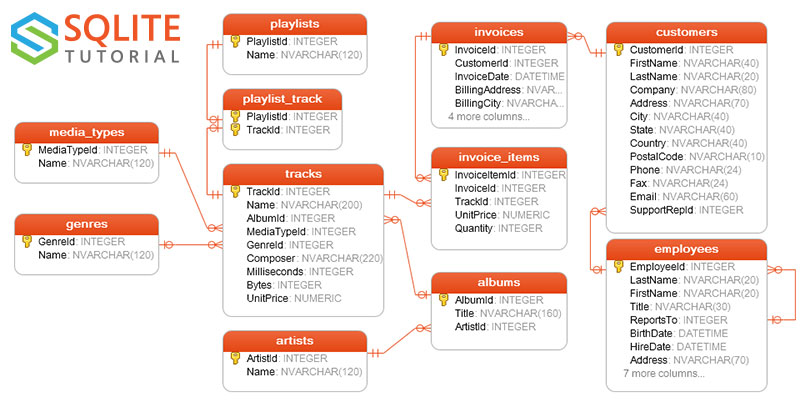

In [298]:
customers = db.Table('customers', meta, autoload=True, autoload_with=engine)

In [299]:
invoices = db.Table('invoices', meta, autoload=True, autoload_with=engine)

In [300]:
print(customers.columns.keys())

['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId']


In [301]:
print(invoices.columns.keys())

['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']


In [302]:
query = db.select([customers])  # SQLite : SELECT * FROM customers
#resultproxy
resultproxy = conn.execute(query)

In [303]:
result = resultproxy.fetchall()

In [305]:
resultproxy.close()

In [306]:
result[:3]

[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3),
 (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5),
 (3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3)]

In [307]:
a = result[0]

In [308]:
a.items()

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_1323/526460222.py:1: SADeprecationWarning: The LegacyRow.items() method is deprecated and will be removed in a future release.  Use the Row._mapping attribute, i.e., 'row._mapping.items()'. (deprecated since: 1.4)
  a.items()


[('CustomerId', 1),
 ('FirstName', 'Luís'),
 ('LastName', 'Gonçalves'),
 ('Company', 'Embraer - Empresa Brasileira de Aeronáutica S.A.'),
 ('Address', 'Av. Brigadeiro Faria Lima, 2170'),
 ('City', 'São José dos Campos'),
 ('State', 'SP'),
 ('Country', 'Brazil'),
 ('PostalCode', '12227-000'),
 ('Phone', '+55 (12) 3923-5555'),
 ('Fax', '+55 (12) 3923-5566'),
 ('Email', 'luisg@embraer.com.br'),
 ('SupportRepId', 3)]

In [309]:
a.keys()

RMKeyView(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId'])

In [310]:
a.values()

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_1323/3214226340.py:1: SADeprecationWarning: The LegacyRow.values() method is deprecated and will be removed in a future release.  Use the Row._mapping attribute, i.e., 'row._mapping.values()'. (deprecated since: 1.4)
  a.values()


[1,
 'Luís',
 'Gonçalves',
 'Embraer - Empresa Brasileira de Aeronáutica S.A.',
 'Av. Brigadeiro Faria Lima, 2170',
 'São José dos Campos',
 'SP',
 'Brazil',
 '12227-000',
 '+55 (12) 3923-5555',
 '+55 (12) 3923-5566',
 'luisg@embraer.com.br',
 3]

In [311]:
result[0].keys()

RMKeyView(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId'])

In [312]:
df = pd.DataFrame(result, columns=result[0].keys())

In [313]:
df.head(3)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [314]:
# Where 조건 방법:
query = db.select([customers]).where(customers.columns.Country == 'Brazil')
# SQLite : SELECT * FROM customers WHERE Contry == 'Brazil'
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(3)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4
2,11,Alexandre,Rocha,Banco do Brasil S.A.,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,+55 (11) 3055-3278,+55 (11) 3055-8131,alero@uol.com.br,5


In [315]:
# AND, OR 활용법:  db.and_    db.or_
query = db.select([customers]).where(db.and_(customers.columns.Country == 'USA',
                                    customers.columns.State == 'CA'))
# SQLite : SELECT * FROM customers WHERE Contry == 'USA' AND State == 'CA'
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(3)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
1,19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
2,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


In [316]:
# ORDER BY 활용 방법: db.asc(오름차순), db.desc(내림차순)
query = db.select([customers.columns.FirstName, customers.columns.LastName]).order_by(db.asc(customers.columns.LastName))
# SQLite : SELECT FirstName, LastName FROM customers ORDER BY asc
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(5)

,FirstName,LastName
0,Roberto,Almeida
1,Julia,Barnett
2,Camille,Bernard
3,Michelle,Brooks
4,Robert,Brown


In [317]:
# GROUP BY 사용: db.func.sum(), 
query = db.select([invoices.columns.BillingCountry, db.func.sum(invoices.columns.Total).label('CountryTotal')]).group_by(invoices.columns.BillingCountry)
# SQLite : SELECT * FROM invoices
resultproxy = conn.execute(query)
result = resultproxy.fetchall()
pd.DataFrame(result, columns=result[0].keys()).head(10)

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_1323/392134812.py:4: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  resultproxy = conn.execute(query)


,BillingCountry,CountryTotal
0,Argentina,37.62
1,Australia,37.62
2,Austria,42.62
3,Belgium,37.62
4,Brazil,190.10
5,Canada,303.96
6,Chile,46.62
7,Czech Republic,90.24
8,Denmark,37.62
9,Finland,41.62


#### SQLAlchemy 에서 Oracle 연결 사례 : 

from sqlalchemy import create_engine
import cx_Oracle

host=hostname
port=port
sid='sid'
user='username'
password='password'
sid = cx_Oracle.makedsn(host, port, sid=sid)

cstr = 'oracle://{user}:{password}@{sid}'.format(
    user=user,
    password=password,
    sid=sid
)

engine =  create_engine(
    cstr,
    convert_unicode=False,
    pool_recycle=10,
    pool_size=50,
    echo=True
)

result = engine.execute('select * from TABLE')

for row in result:
    print row
 